# Alexander Albon

<img src="https://www.formula1.com/content/fom-website/en/drivers/alexander-albon/_jcr_content/image.img.1920.medium.jpg/1646750995556.jpg" width="300">

### Team: Williams 

<img src ="https://www.formula1.com/content/fom-website/en/drivers/alexander-albon/_jcr_content/helmet.img.png/1646824579444.png" width="200">



In [136]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

In [137]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [138]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

alb_laps <- lap_data %>%
            filter(driverId == 848)

# Filtering Lap Data for WILLIAMS
wlms_lap <- lap_data %>%
             filter(driverId %in% c(9, 13, 814, 845, 851))

# Season Analysis

In [187]:
test <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

test

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5817236,96.95394,1.615899


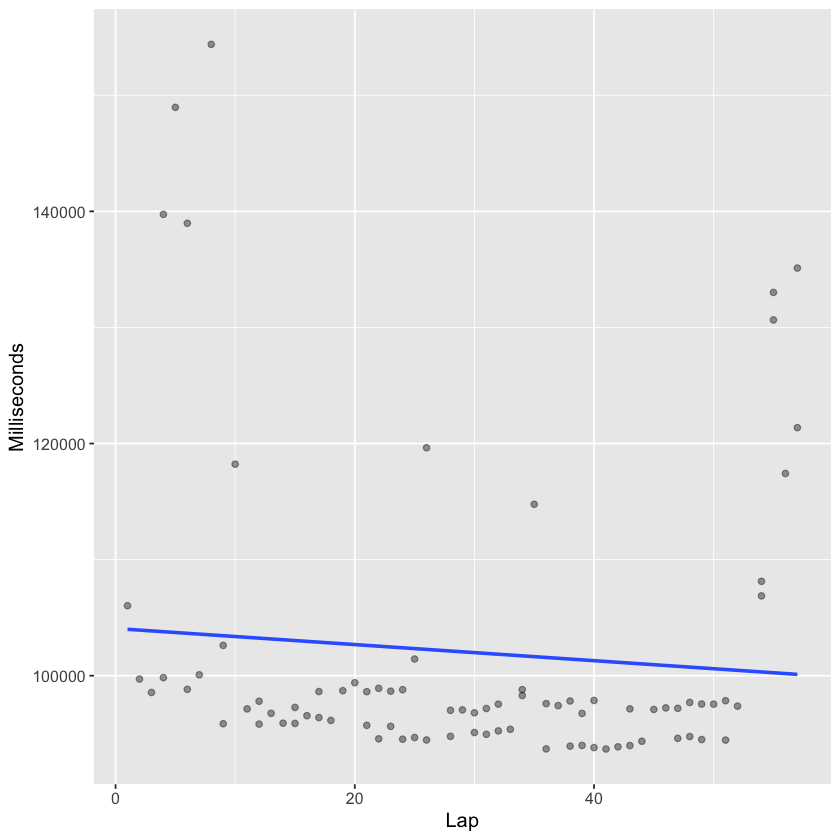

In [188]:
#1. Bahrain 

### UNIQUE DATA

aa_bahrain <- alb_laps %>%
                filter(raceId %in% bahrain_race_ID) 

aa_bahrain_clean <- aa_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

aa_bahrain_clean_ID <- aa_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_bahrain_races <- alb_laps %>%
                    filter(raceId %in% aa_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1042,65


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5543105,92.38508,1.539751


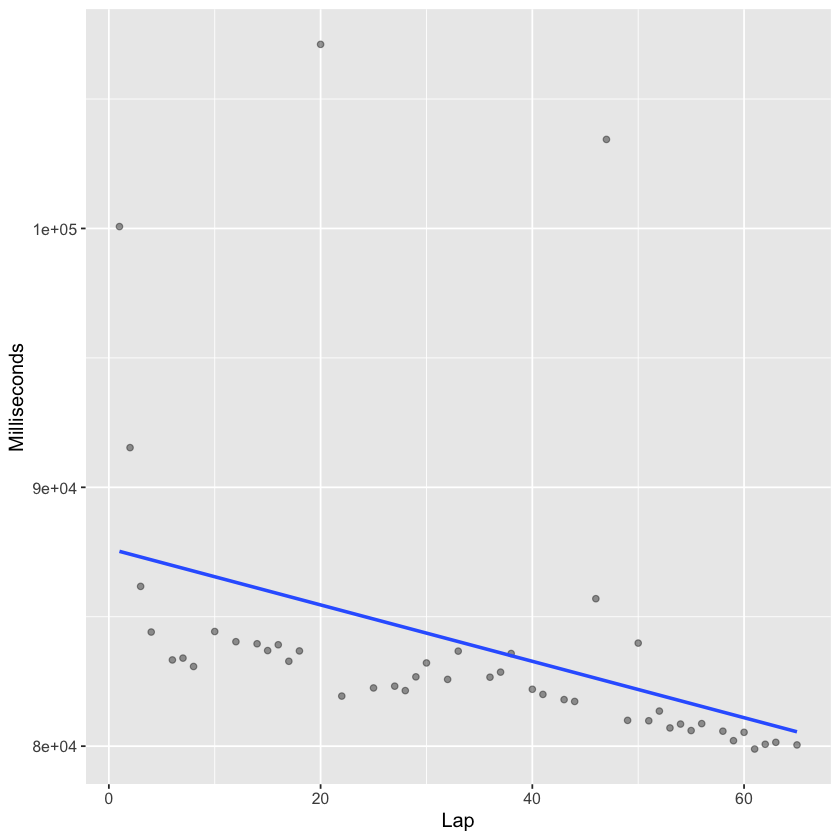

In [189]:
#2. Portimão

aa_Portimão <- alb_laps %>%
                filter(raceId %in% Portimão_race_ID) 

aa_Portimão_clean <- aa_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_Portimão_clean
aa_Portimão_clean_ID <- aa_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_Portimão_races <- alb_laps %>%
                    filter(raceId %in% aa_Portimão_clean_ID) 

formulaone_split <- initial_split(aa_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5256147,87.60245,1.460041


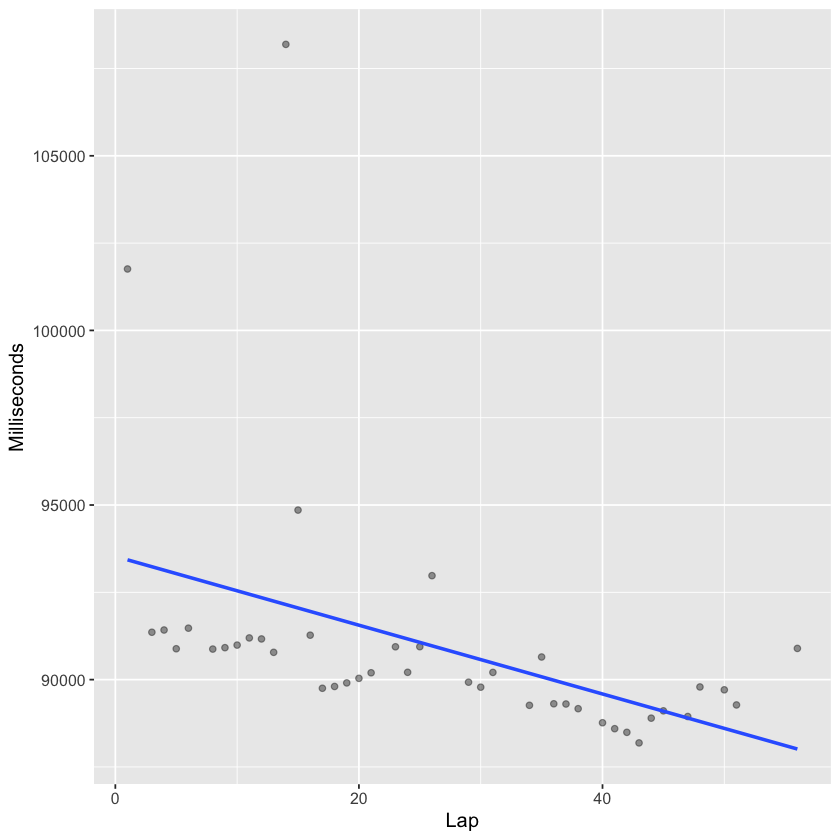

In [190]:
#3. Australia

aa_aus <- alb_laps %>%
                filter(raceId %in% aus_race_ID) 

aa_aus_clean <- aa_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_aus_clean_ID <- aa_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_aus_races <- alb_laps %>%
                    filter(raceId %in% aa_aus_clean_ID)

formulaone_split <- initial_split(aa_aus_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

### GETS PREDICTION

get_australia_prediction()

raceId,n
<dbl>,<int>
1043,63


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5401832,90.03054,1.500509


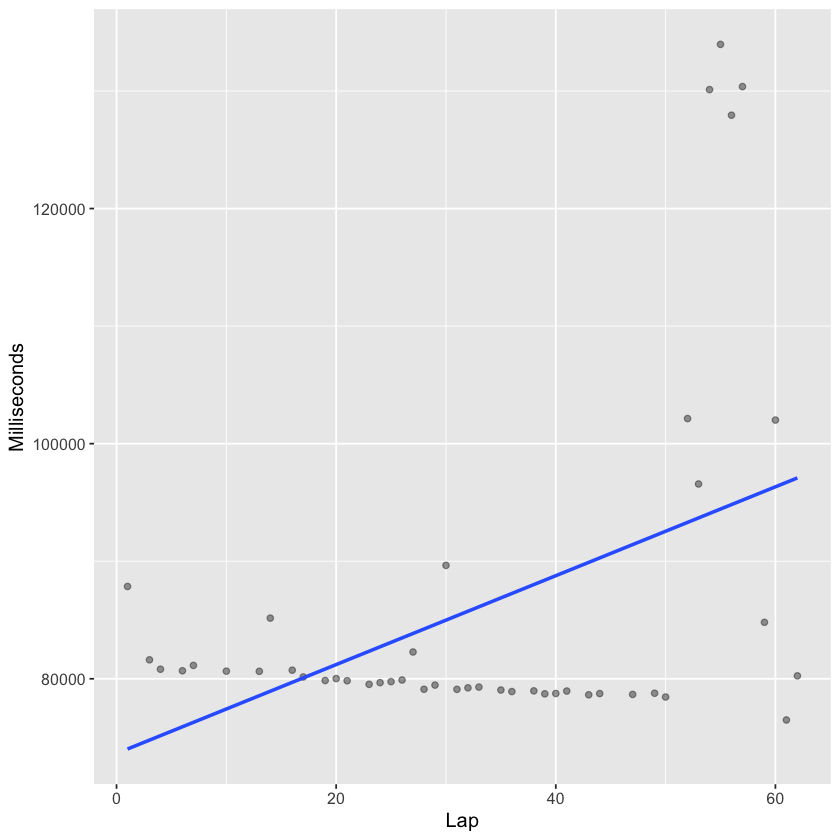

In [191]:
#4. Italy, Imola

aa_imola <- alb_laps %>%
                filter(raceId %in% imola_race_ID) 

aa_imola_clean <- aa_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_imola_clean
aa_imola_clean_ID <- aa_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_imola_races <- alb_laps %>%
                    filter(raceId %in% aa_imola_clean_ID)

formulaone_split <- initial_split(aa_imola_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

raceId,n
<dbl>,<int>
1044,58


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6057335,100.9556,1.682593


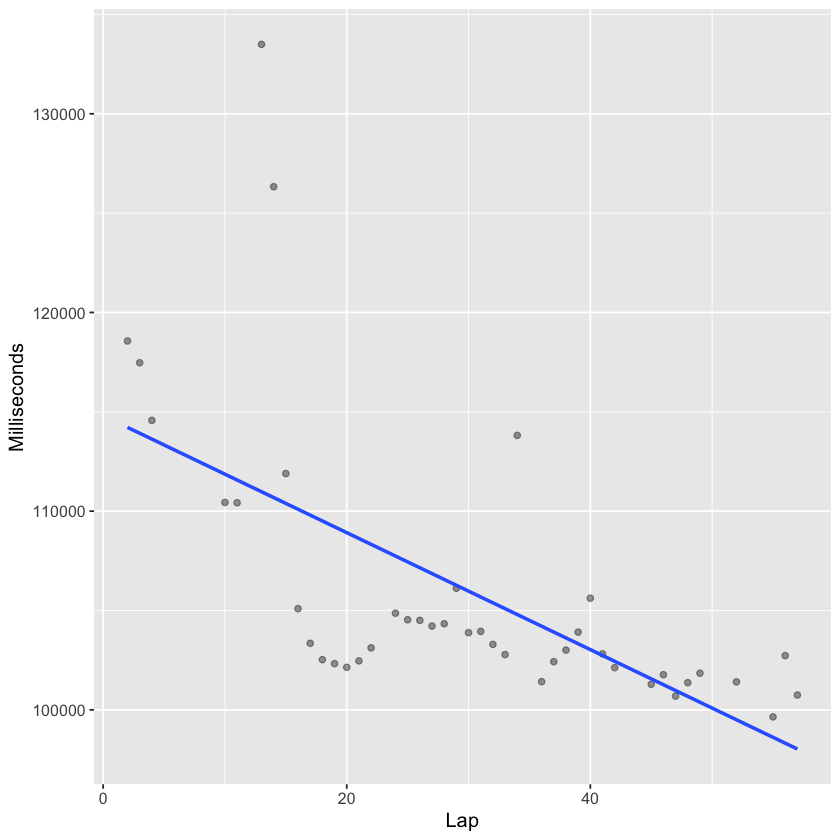

In [192]:
#5. Turkey (Replacing Miami)

aa_turkey <- alb_laps %>%
                filter(raceId %in% turkey_race_ID) 

aa_turkey_clean <- aa_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_turkey_clean
aa_turkey_clean_ID <- aa_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_turkey_races <- alb_laps %>%
                    filter(raceId %in% aa_turkey_clean_ID)

formulaone_split <- initial_split(aa_turkey_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5652076,94.20127,1.570021


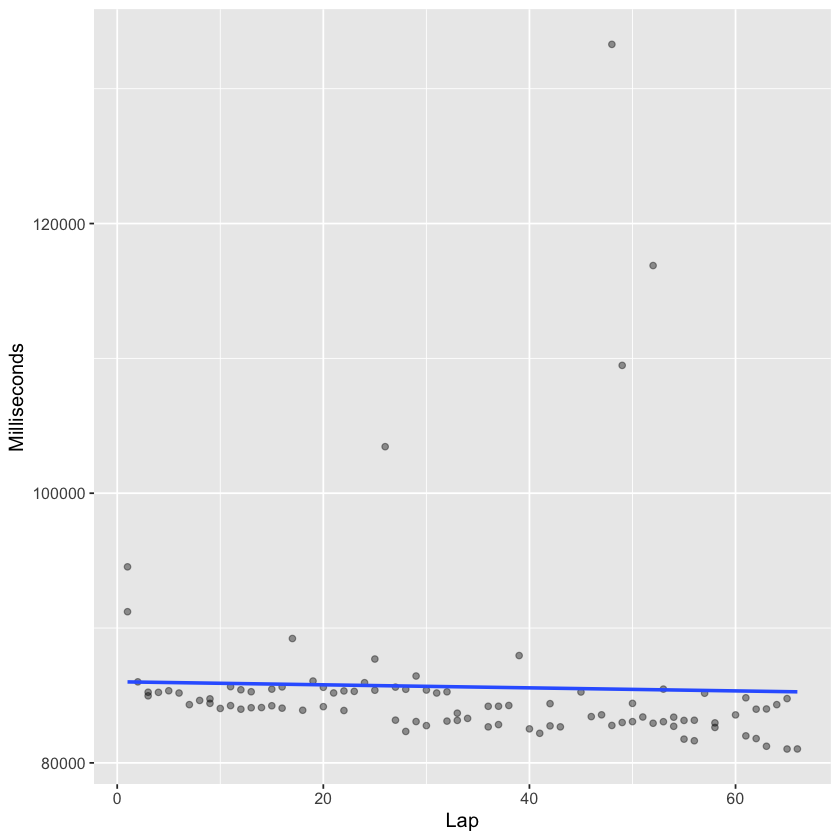

In [193]:
#6. Spain

aa_spain <- alb_laps %>%
                filter(raceId %in% spain_race_ID) 

aa_spain_clean <- aa_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_spain_clean_ID <- aa_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_spain_races <- alb_laps %>%
                    filter(raceId %in% aa_spain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_spain_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

raceId,n
<dbl>,<int>
1015,78


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6248975,104.1496,1.735826


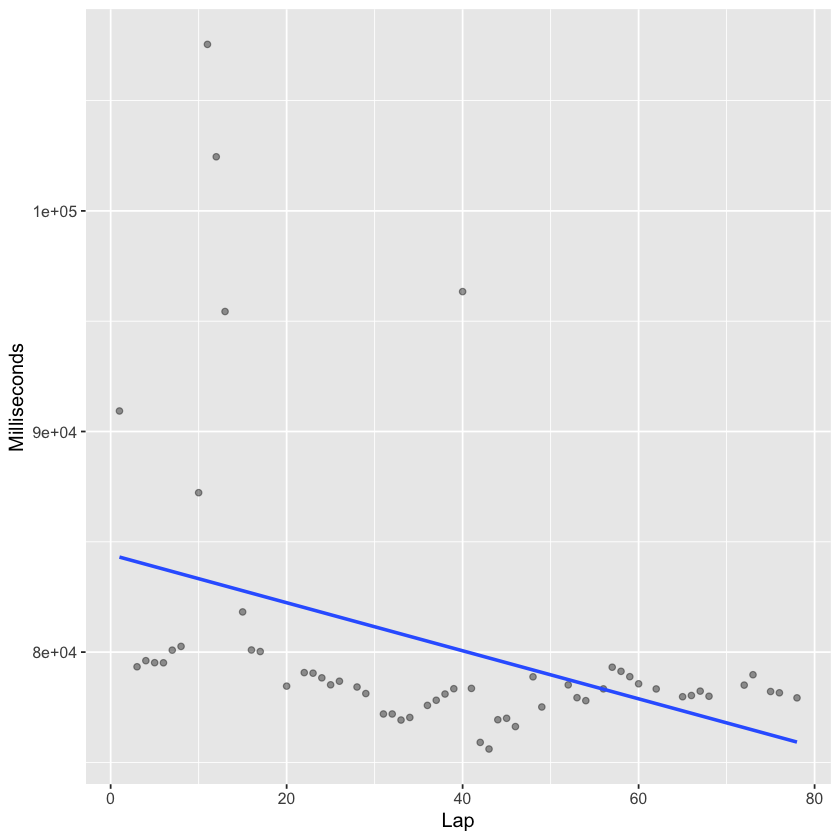

In [194]:
#7. Monaco

aa_monaco <- alb_laps %>%
                filter(raceId %in% monaco_race_ID) 

aa_monaco_clean <- aa_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_monaco_clean
aa_monaco_clean_ID <- aa_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_monaco_races <- alb_laps %>%
                    filter(raceId %in% aa_monaco_clean_ID)

formulaone_split <- initial_split(aa_monaco_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

raceId,n
<dbl>,<int>
1013,50


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5670865,94.51442,1.57524


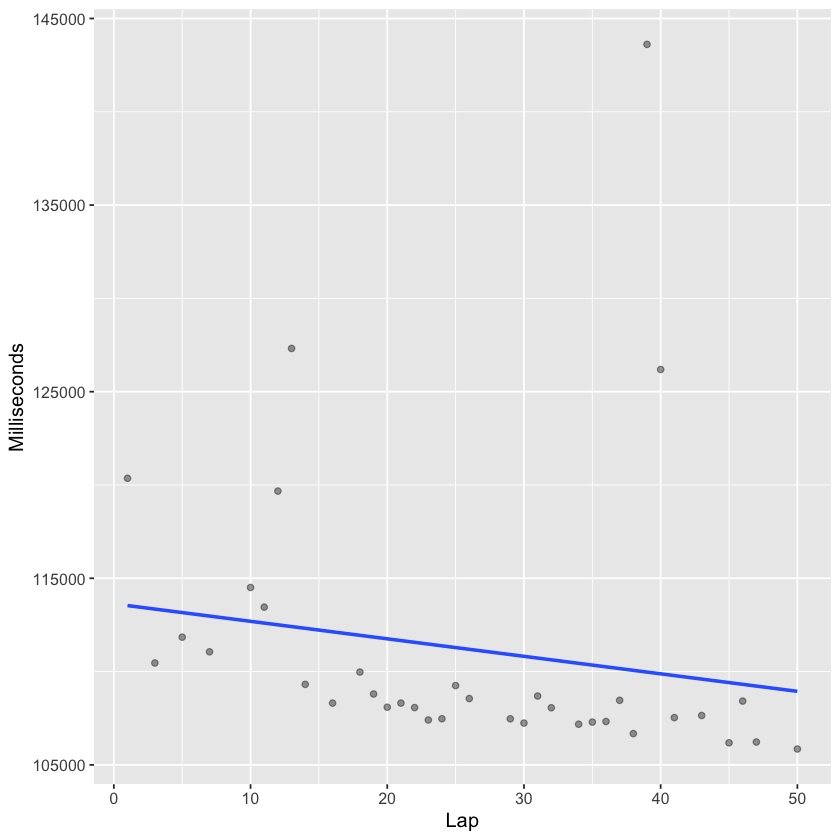

In [195]:
#8. Azerbaijan

aa_azerbaijan <- alb_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

aa_azerbaijan_clean <- aa_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_azerbaijan_clean
aa_azerbaijan_clean_ID <- aa_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_azerbaijan_races <- alb_laps %>%
                    filter(raceId %in% aa_azerbaijan_clean_ID)

formulaone_split <- initial_split(aa_azerbaijan_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

raceId,n
<dbl>,<int>
1016,59


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5492228,91.53713,1.525619


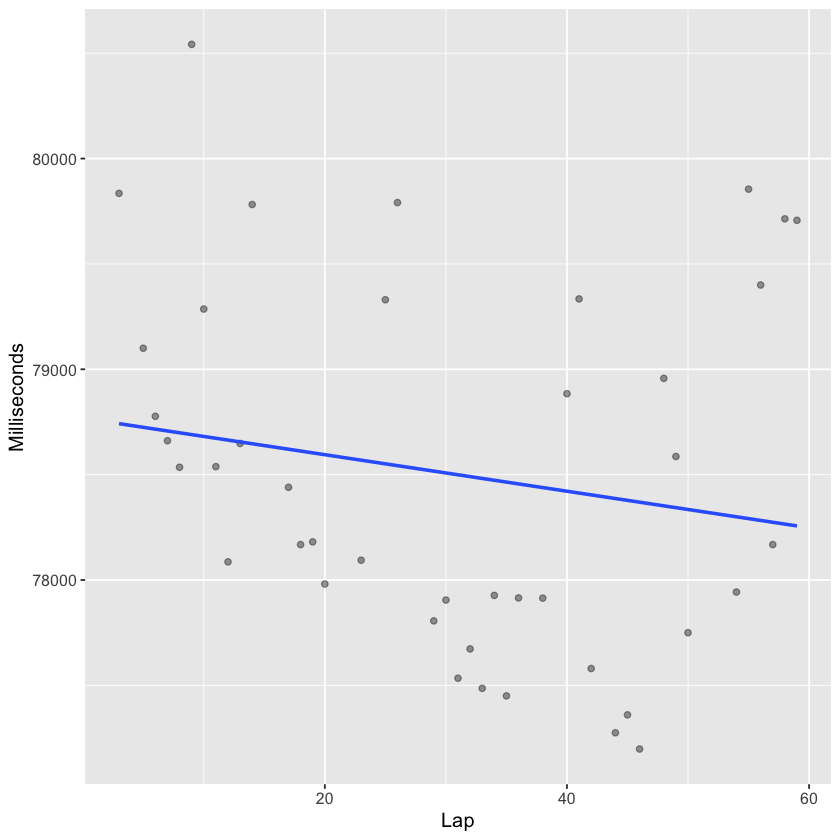

In [196]:
#9. Canada

aa_canada <- alb_laps %>%
                filter(raceId %in% canada_race_ID) 

aa_canada_clean <- aa_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_canada_clean
aa_canada_clean_ID <- aa_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_canada_races <- alb_laps %>%
                    filter(raceId %in% aa_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_canada_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

### GETS PREDICTION

get_canada_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5003554,83.39257,1.389876


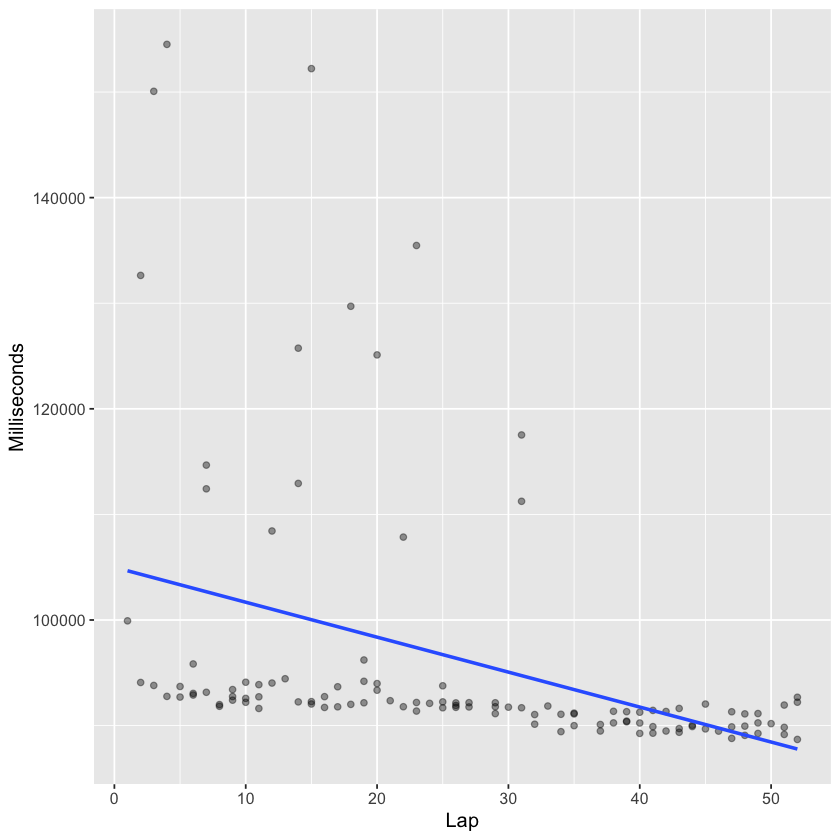

In [197]:
#10. Great Britain

aa_uk <- alb_laps %>%
                filter(raceId %in% uk_race_ID) 

aa_uk_clean <- aa_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_uk_clean_ID <- aa_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_uk_races <- alb_laps %>%
                    filter(raceId %in% aa_uk_clean_ID)

formulaone_split <- initial_split(aa_uk_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5178529,86.30881,1.43848


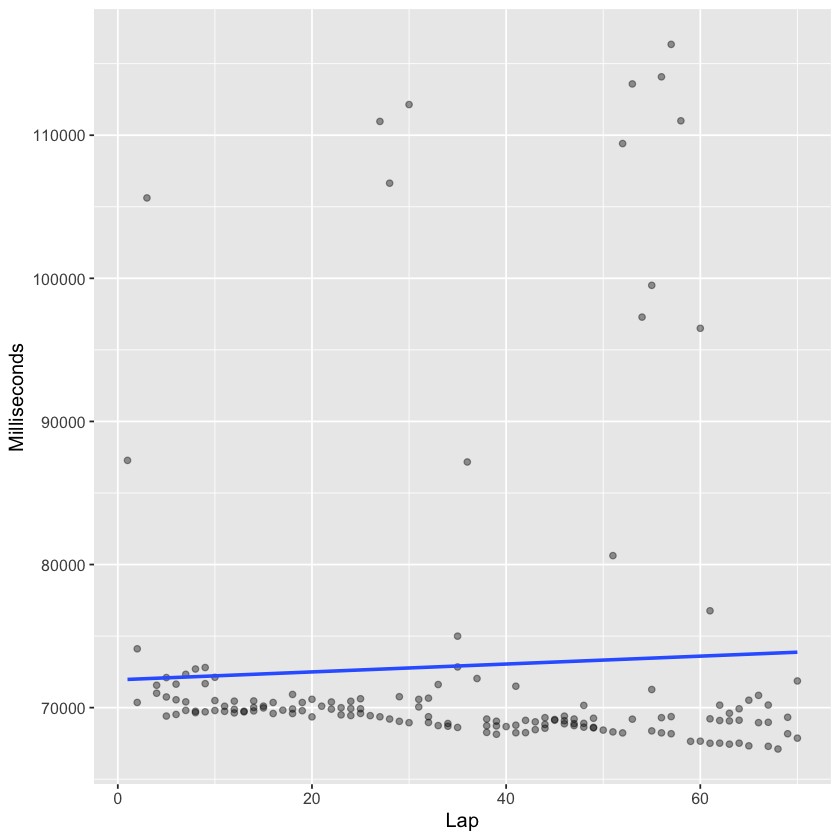

In [198]:
#11. Austria

aa_austria <- alb_laps %>%
                filter(raceId %in% austria_race_ID) 

aa_austria_clean <- aa_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_austria_clean_ID <- aa_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_austria_races <- alb_laps %>%
                    filter(raceId %in% aa_austria_clean_ID)

formulaone_split <- initial_split(aa_austria_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
996,52
1017,51


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5443984,90.73307,1.512218


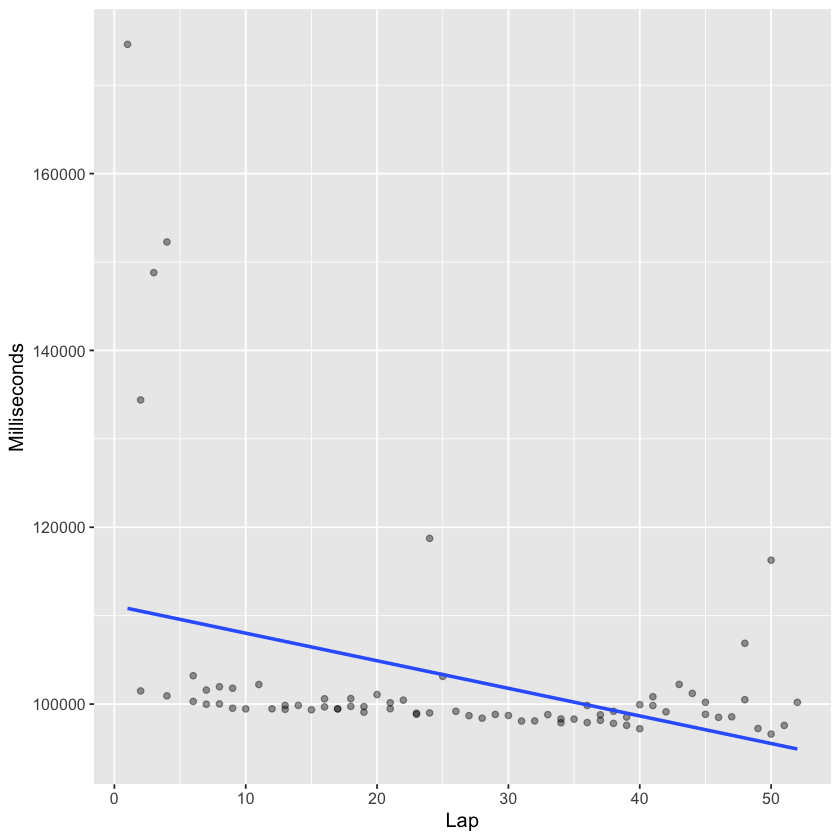

In [199]:
#12. France

aa_france <- wlms_lap %>%
                filter(raceId %in% france_race_ID) 

aa_france_clean <- aa_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_france_clean
aa_france_clean_ID <- aa_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_france_races <- wlms_lap %>%
                    filter(raceId %in% aa_france_clean_ID)

formulaone_split <- initial_split(aa_france_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5856367,97.60611,1.626769


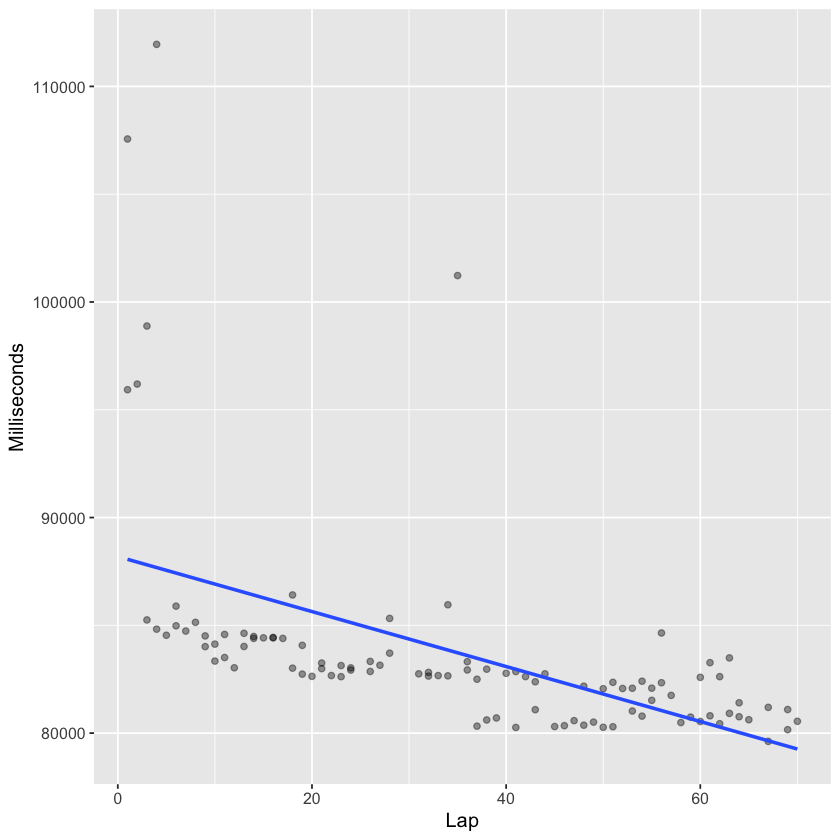

In [200]:
#13.  Hungary

aa_hungary <- alb_laps %>%
                filter(raceId %in% hungary_race_ID) 

aa_hungary_clean <- aa_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
                     

aa_hungary_clean_ID <- aa_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_hungary_races <- alb_laps %>%
                    filter(raceId %in% aa_hungary_clean_ID)

formulaone_split <- initial_split(aa_hungary_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
30,88
49,88
349,88
852,88
871,88
891,70
12,44
103,44
911,44


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5203541,86.72568,1.445428


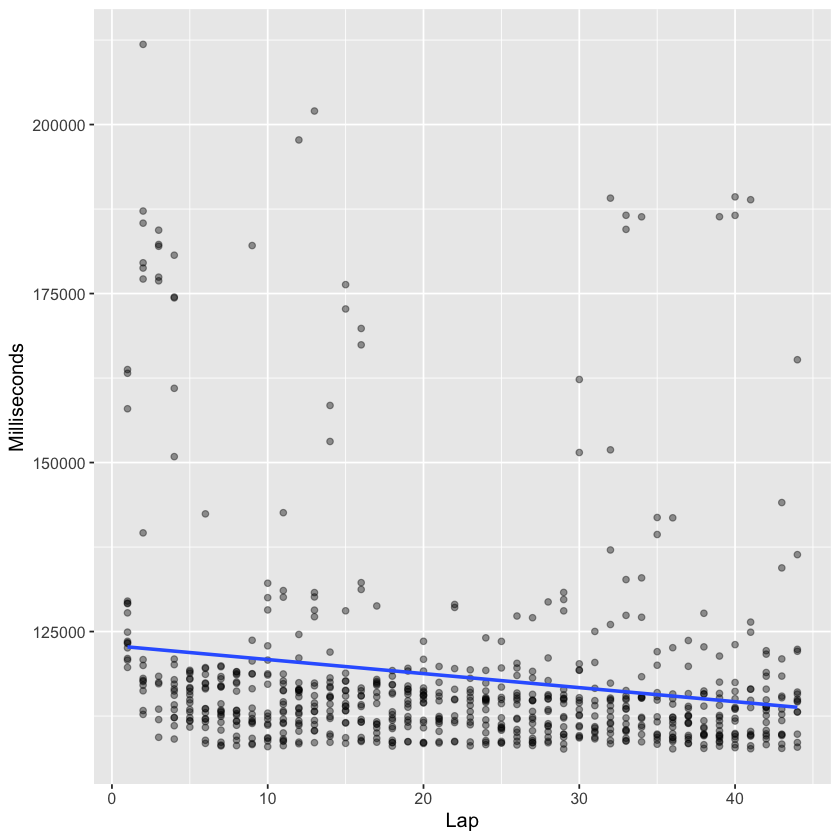

In [201]:
#14. Belgium

aa_belgium <- wlms_lap %>%
                filter(raceId %in% belgium_race_ID) 

aa_belgium_clean <- aa_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_belgium_clean
aa_belgium_clean_ID <- aa_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_belgium_races <- wlms_lap %>%
                    filter(raceId %in% aa_belgium_clean_ID)  %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_belgium_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5615472,93.59119,1.559853


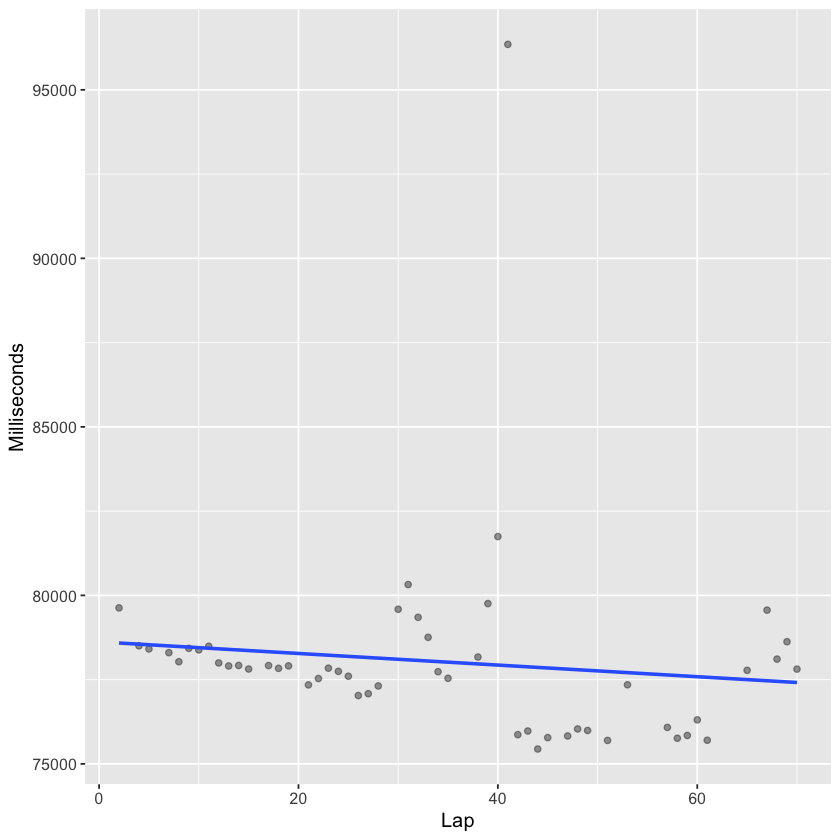

In [202]:
#15. Netherlands

aa_netherlands <- wlms_lap %>%
                filter(raceId %in% netherlands_race_ID) 

aa_netherlands_clean <- aa_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_netherlands_clean
aa_netherlands_clean_ID <- aa_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_netherlands_races <- wlms_lap %>%
                    filter(raceId %in% aa_netherlands_clean_ID)

formulaone_split <- initial_split(aa_netherlands_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

raceId,n
<dbl>,<int>
1023,53
1038,53


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4722440,78.70733,1.311789


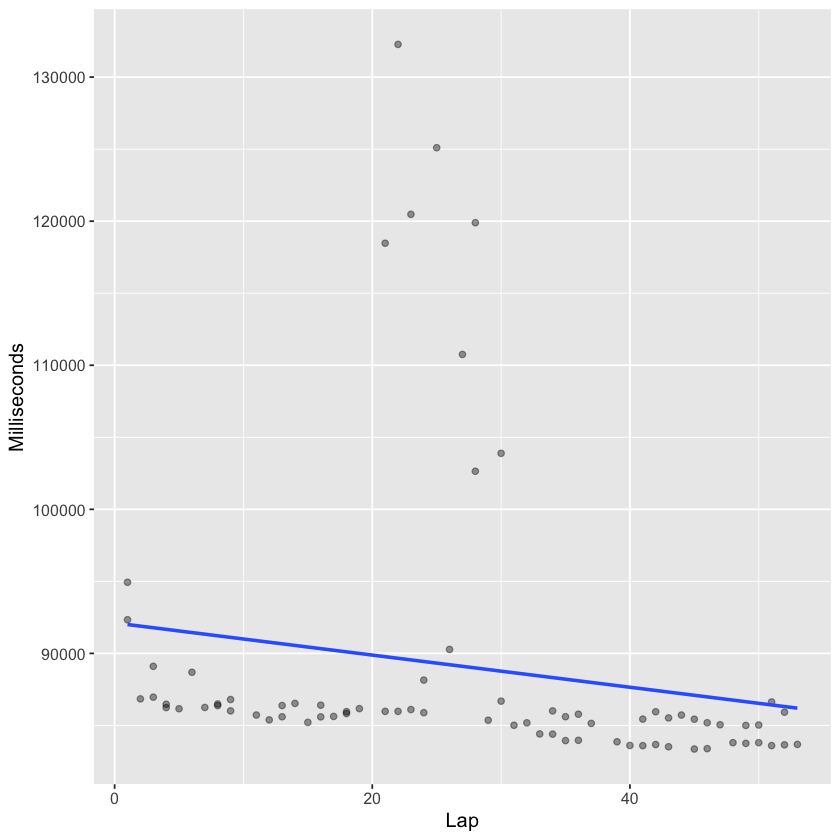

In [203]:
#16. Italy, Monza

aa_monza <- alb_laps %>%
                filter(raceId %in% monza_race_ID) 

aa_monza_clean <- aa_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
aa_monza_clean
aa_monza_clean_ID <- aa_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_monza_races <- alb_laps %>%
                    filter(raceId %in% aa_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(aa_monza_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
7097080,118.2847,1.971411


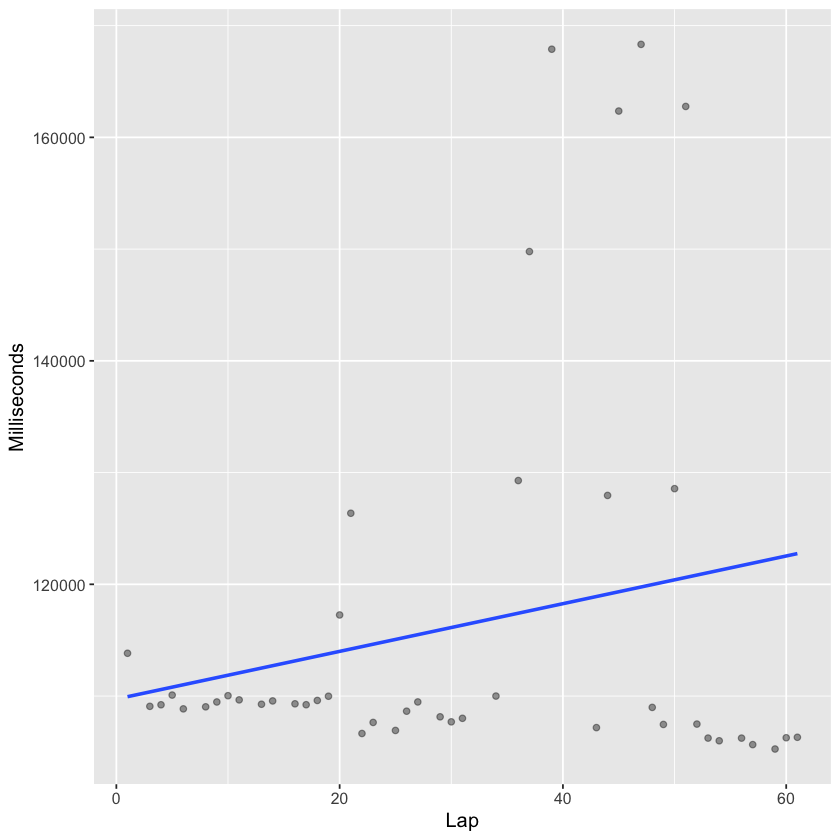

In [204]:
#17. Singapore

aa_singapore <- alb_laps %>%
                filter(raceId %in% singapore_race_ID) 

aa_singapore_clean <- aa_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_singapore_clean_ID <- aa_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_singapore_races <- alb_laps %>%
                    filter(raceId %in% aa_singapore_clean_ID)

formulaone_split <- initial_split(aa_singapore_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

### GETS PREDICTION

get_singapore_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5047406,84.12343,1.402057


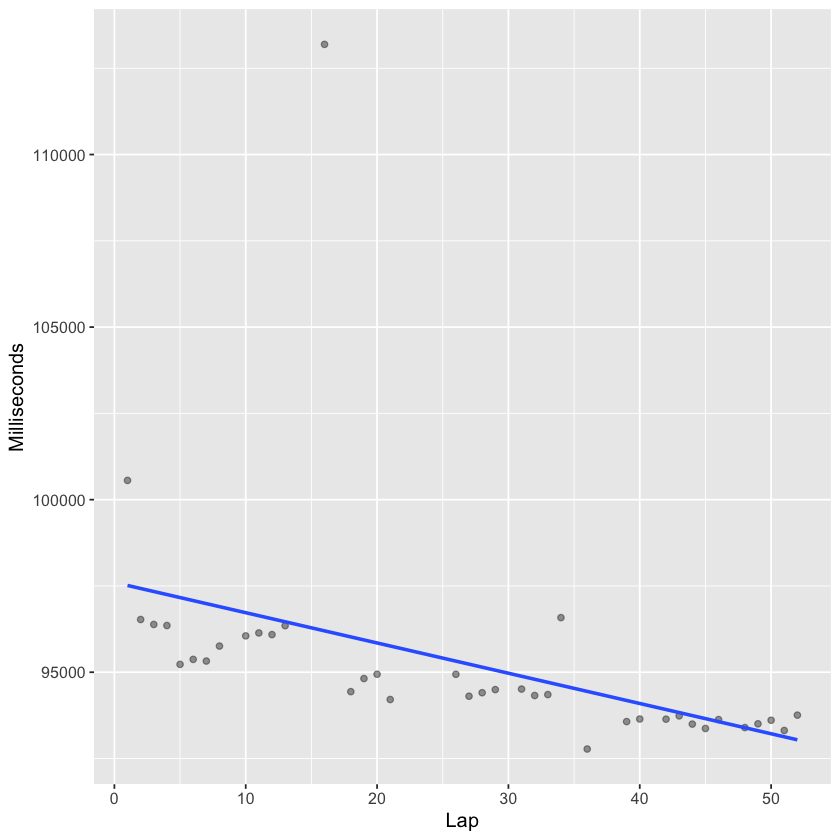

In [205]:
#18. Japan

aa_japan <- alb_laps %>%
                filter(raceId %in% japan_race_ID) 

aa_japan_clean <- aa_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
aa_japan_clean_ID <- aa_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_japan_races <- alb_laps %>%
                    filter(raceId %in% aa_japan_clean_ID)

formulaone_split <- initial_split(aa_japan_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

### GETS PREDICTION

get_japan_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5732506,95.54177,1.592363


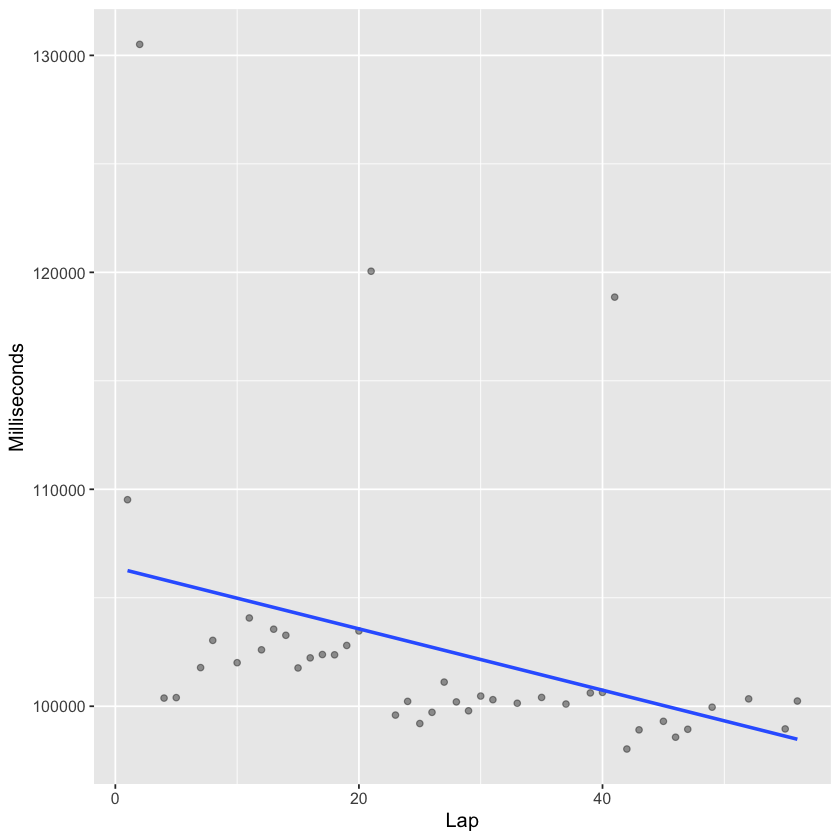

In [206]:
#19. USA, Austin

aa_austin <- alb_laps %>%
                filter(raceId %in% austin_race_ID) 

aa_austin_clean <- aa_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_austin_clean_ID <- aa_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_austin_races <- alb_laps %>%
                    filter(raceId %in% aa_austin_clean_ID)

formulaone_split <- initial_split(aa_austin_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5764981,96.08301,1.601384


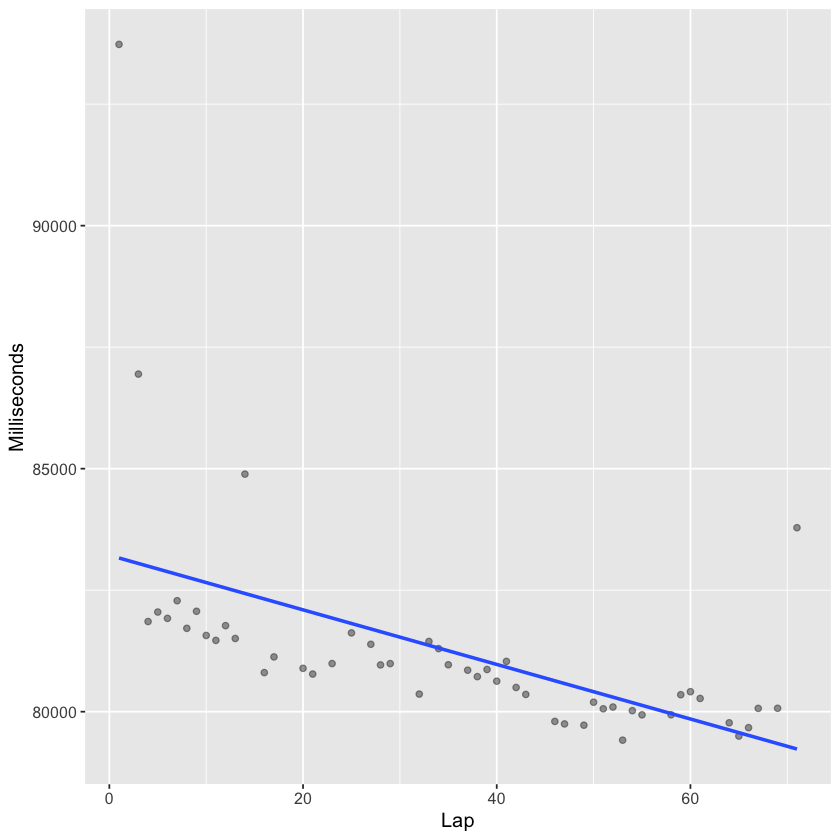

In [207]:
#20. Mexico

aa_mexico <- alb_laps %>%
                filter(raceId %in% mexico_race_ID) 

aa_mexico_clean <- aa_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_mexico_clean_ID <- aa_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_mexico_races <- alb_laps %>%
                    filter(raceId %in% aa_mexico_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(aa_mexico_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5764981,96.08301,1.601384


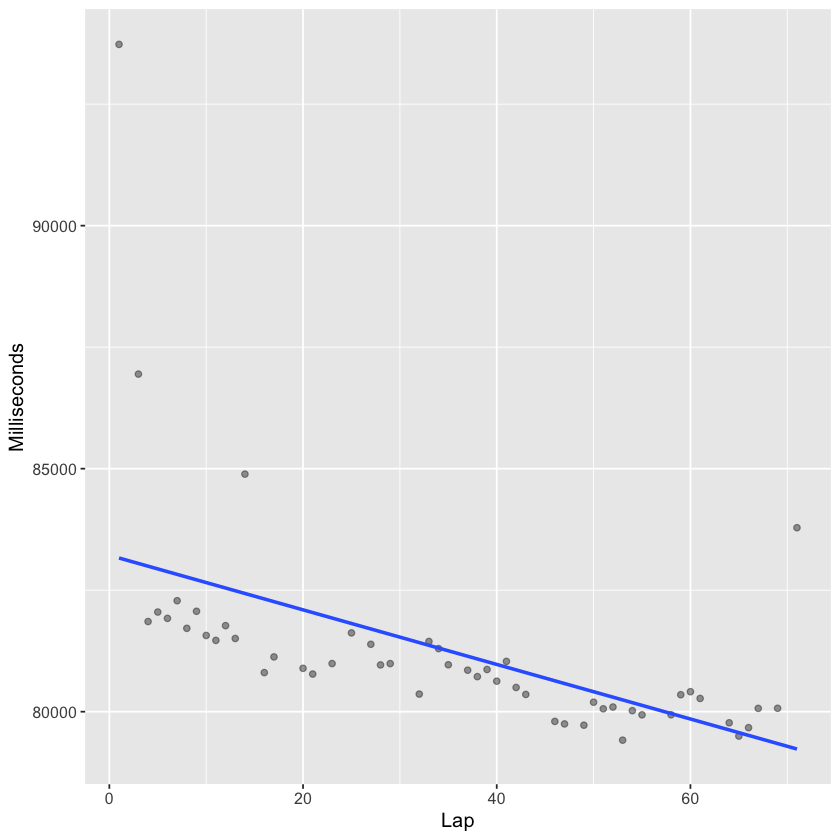

In [208]:
#21. Brazil

aa_brazil <- wlms_lap %>%
                filter(raceId %in% brazil_race_ID) 

aa_brazil_clean <- aa_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_brazil_clean_ID <- aa_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_brazil_races <- wlms_lap %>%
                    filter(raceId %in% aa_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(aa_brazil_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

#initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6039808,100.6635,1.677725


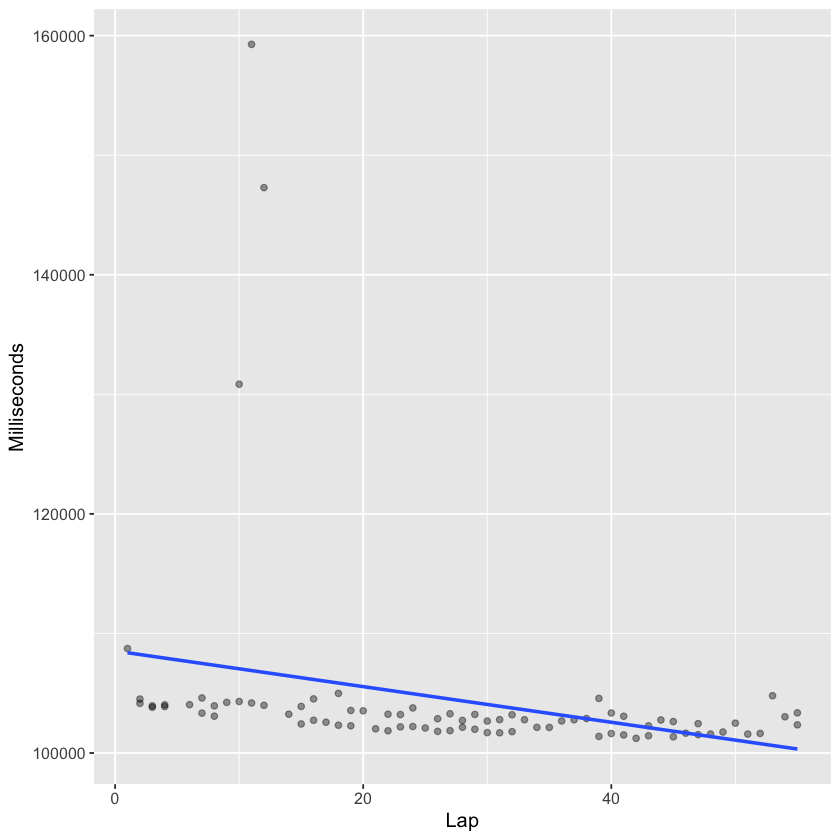

In [209]:
#22. Abu Dhabi

aa_uae <- alb_laps %>%
                filter(raceId %in% uae_race_ID) 

aa_uae_clean <- aa_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

aa_uae_clean_ID <- aa_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

aa_uae_races <- alb_laps %>%
                    filter(raceId %in% aa_uae_clean_ID)

formulaone_split <- initial_split(aa_uae_races, prop = 0.75, strata = milliseconds)

### SPLITS DATA

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction ()

## Collection

In [210]:
test

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,17769.216,1
rmse,standard,2068.734,2
rmse,standard,1893.266,3
rmse,standard,10518.769,4
rmse,standard,5801.366,5
rmse,standard,9006.861,6
rmse,standard,6919.695,7
rmse,standard,2540.135,8
rmse,standard,1483.370,9
